# Линейные модели в машинном обучении

## Описание проекта

Данный проект подразумевает под собой общий анализ двух компаний связанных с Сельскохозяйственной продукцией и построенние необходимых моделей для их выгодного сотрудничества.

## Цель проекта

Выгодно ли заключение контракта двух организаций и на каких условиях

## Описание данных

В данных есть информация о коровах обеих организаций (вид корма, родословная, удой, порода, свойства получаемого молока и т.д.)

## План работы

1. Загрузка и изучение данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Корреляционный анализ признаков в датасете ferma_main.csv
5. Задача регрессии
6. Задача классификации
7. Итоговые выводы

In [1]:
from phik import resources, report
from phik.phik import phik_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## Загрузка данных

In [2]:
#анализируем 1 набор данных
filepath = r"C:\Users\erofe\Downloads\ferma_main.csv"
df_main = pd.read_csv(filepath, sep = ';')
#ищем дубликаты
print(df_main.duplicated().sum())
#выводим первые 10 строк таблицы
print(df_main.head(10))
#выводим информацию о таблице
print(df_main.info())

5
   id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   
5   6      5254                                  12,7              1806   
6   7      5910                                  13,2              1792   
7   8      6179                                  14,7              1806   
8   9      6783                                  14,2              1918   
9  10      5339                                  13,4              1791   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                           

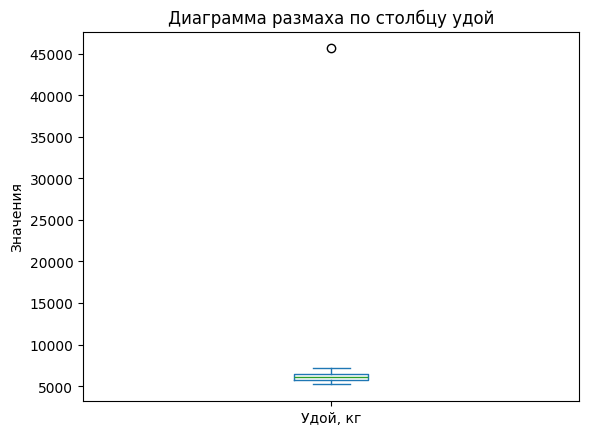

In [3]:
#строим диаграммы размаха для столбцов, где выбросы надо будет удалять
df_main['Удой, кг'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу удой', ylabel = 'Значения')
plt.show()

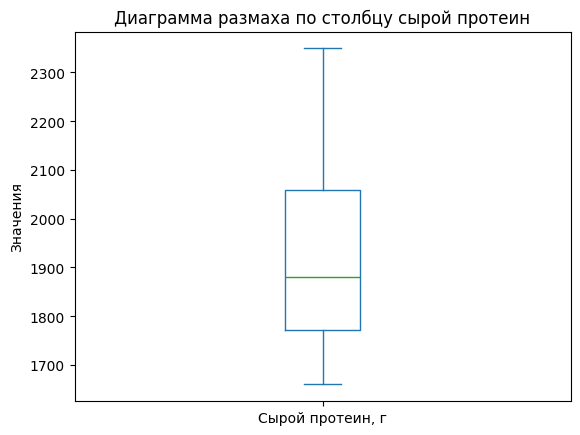

In [4]:
df_main['Сырой протеин, г'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу сырой протеин', ylabel = 'Значения')
plt.show()

Имеются 5 полных дубликатов строк (даже id коров повтрояется) это явно будет удалено. Нулевых значений не наблюдается. Большое количество строк имеют неправильный тип данных, что будет устранено, из-за этого не получилось провести проверку на выбросы во всех числовых столбцах, пока что они найдены только в столбце с удоем, что будет устранено.

In [5]:
#анализируем 2 набор данных
filepath = r"C:\Users\erofe\Downloads\ferma_dad.csv"
df_dad = pd.read_csv(filepath, sep = ';')
#ищем дубликаты
print(df_dad.duplicated().sum())
#выводим первые 10 строк таблицы
print(df_dad.head(10))
#выводим информацию о таблице
print(df_dad.info())

0
   id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин
5   6     Барин
6   7  Соловчик
7   8  Геркулес
8   9    Буйный
9  10     Барин
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None


С данными все хорошо, аномалий не наблюдается.

In [6]:
#анализируем 3 набор данных
filepath = r"C:\Users\erofe\Downloads\cow_buy.csv"
df_buy = pd.read_csv(filepath, sep = ';')
#ищем дубликаты
print(df_buy.duplicated().sum())
#выводим первые 10 строк таблицы
print(df_buy.head(10))
#выводим информацию о таблице
print(df_buy.info())

4
            Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   
5  РефлешнСоверинг    равнинное          Соверин  Геркулес               3,63   
6   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
7   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,57   
8  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
9  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет  
1                   3,08

В данных замечено 4 дубликата строк, но в данном случае, это оправдано и их удалять нельзя. Большое количество строк имеют неправильный тип данных, что будет устранено, из-за этого не получилось провести проверку на выбросы во всех числовых столбцах.

Вывод: Была получена информация о 3 датафреймах. В 1 были найдены дубликаты и выбросы, которые будут устранены. Так же будет изменен тип данных, где это необходимо. Во 2 датафрейме данные идеальны. В 3 датафреймы, были найдены 4 дубликата, которые не стоит удалять и так же будет изменен тип данных, где необходимо

##  Предобработка данных

In [7]:
#удаляем дубликаты в 1 датафрейме
df_main = df_main.drop_duplicates().reset_index()
#так же в столбцах имеются неявные дубликаты, удалим и их
df_main['Тип пастбища'] = df_main['Тип пастбища'].str.replace('ы', 'о')
df_main['порода папы_быка'] = df_main['порода папы_быка'].str.replace('Айдиалл', 'Айдиал')
#Меняем тип данных там, где это необходимо
df_main['ЭКЕ (Энергетическая кормовая единица)'] = df_main['ЭКЕ (Энергетическая кормовая единица)'].str.replace(',', '.').astype('float')
df_main['СПО (Сахаро-протеиновое соотношение)'] = df_main['СПО (Сахаро-протеиновое соотношение)'].str.replace(',', '.').astype('float')
df_main['Жирность,%'] = df_main['Жирность,%'].str.replace(',', '.').astype('float')
df_main['Белок,%'] = df_main['Белок,%'].str.replace(',', '.').astype('float')
df_buy['Текущая_жирность,%'] = df_buy['Текущая_жирность,%'].str.replace(',', '.').astype('float')
df_buy['Текущий_уровень_белок,%'] = df_buy['Текущий_уровень_белок,%'].str.replace(',', '.').astype('float')

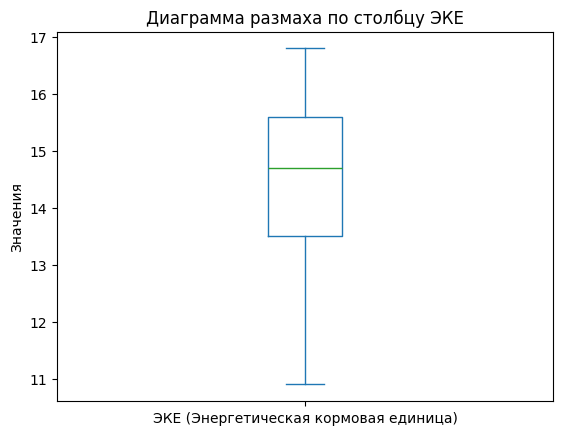

In [8]:
#Проверяем на выбросы столбцы, с изменённым типом данных
df_main['ЭКЕ (Энергетическая кормовая единица)'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу ЭКЕ', ylabel = 'Значения')
plt.show()

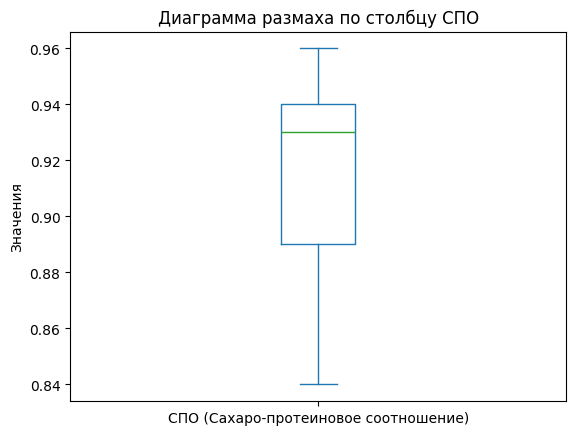

In [9]:
df_main['СПО (Сахаро-протеиновое соотношение)'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу СПО', ylabel = 'Значения')
plt.show()

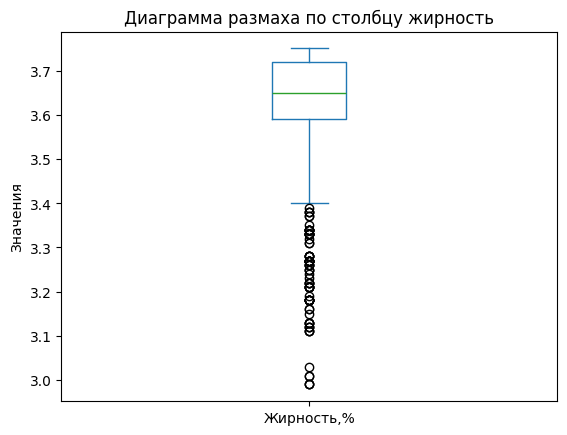

In [10]:
df_main['Жирность,%'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу жирность', ylabel = 'Значения')
plt.show()

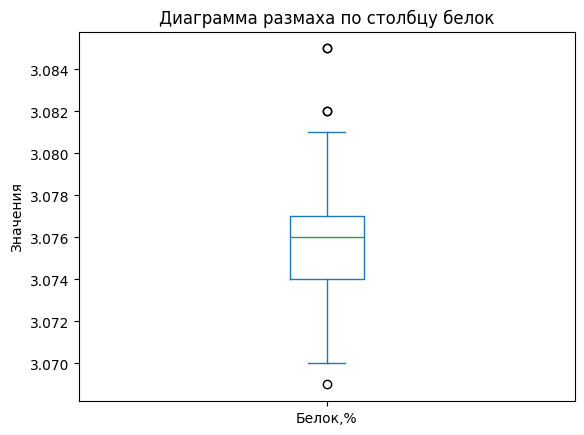

In [11]:
df_main['Белок,%'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу белок', ylabel = 'Значения')
plt.show()

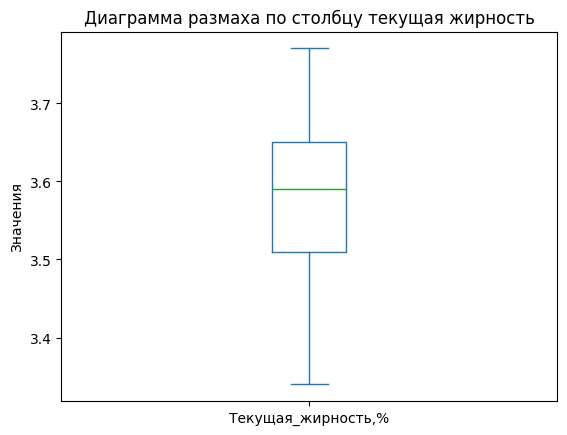

In [12]:
df_buy['Текущая_жирность,%'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу текущая жирность', ylabel = 'Значения')
plt.show()

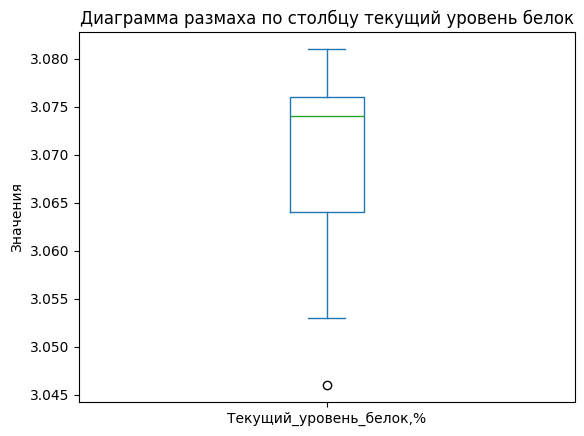

In [13]:
df_buy['Текущий_уровень_белок,%'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу текущий уровень белок', ylabel = 'Значения')
plt.show()

Выбросы имеются, только в столбцах с белком и жирностью молока, этот разброс не является критичным, и смотрится вполне логичным, поэтому удаляем выбросы, только в столбце с удоем, где они уж очень нереалистичны.

In [14]:
#строим функцию для удаления выбросов
def remove_outliers(data, column_name, threshold=1.5):
    
    # Вычисляем квартили для столбца
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    
    # Вычисляем IQR
    IQR = Q3 - Q1
    
    # Вычисляем границы для определения выбросов
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Удаляем выбросы
    data_cleaned = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    
    return data_cleaned

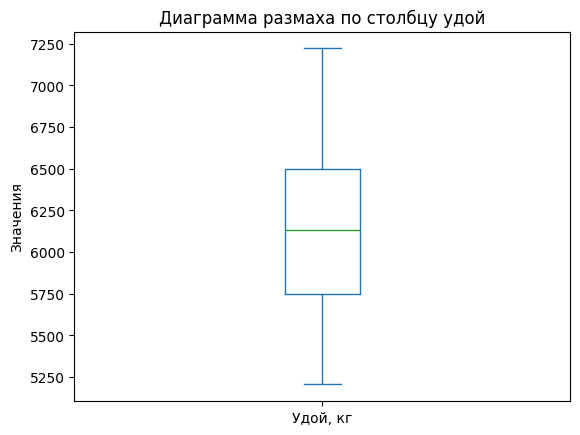

In [15]:
#удаляем выбросы в столбце с удоем
df_main = remove_outliers(df_main, 'Удой, кг')
#делаем проверку
df_main['Удой, кг'].plot(kind = 'box', title = 'Диаграмма размаха по столбцу удой', ylabel = 'Значения')
plt.show()

Вывод: Была произведена предобработка данных, в ходе которой, был очищен 1 датафрейм от дубликатов и выбросов, а так же, был изменён тип данных в некоторых столбцах из 1 и 3 датафрейма на правильный.

## Исследовательский анализ данных

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: Удой, кг, dtype: float64

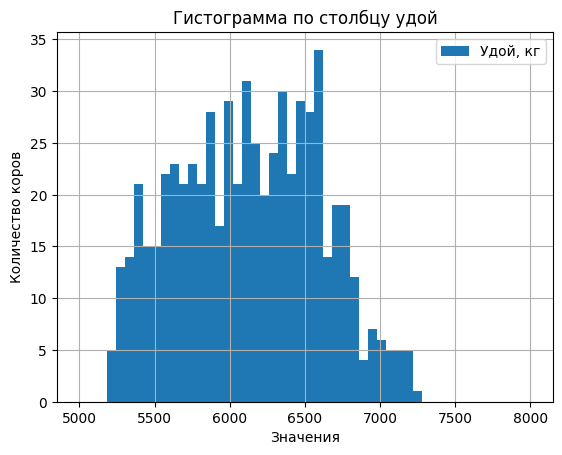

In [16]:
#Проводим анализ всех имеющихся признаков
df_main.plot(y = 'Удой, кг', kind = 'hist', bins = 50, grid=True, range = (5000, 8000), title = 'Гистограмма по столбцу удой')
plt.xlabel('Значения')
plt.ylabel('Количество коров')
df_main['Удой, кг'].describe()

Среднее значение удою - 6125 кг, самое популярное значение около 6700 кг, распределение нормальное, хоть и может иногда резко взлетать и резко опускаться.

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: ЭКЕ (Энергетическая кормовая единица), dtype: float64

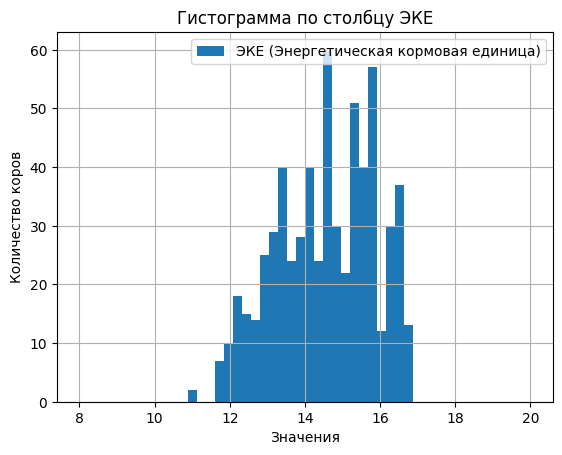

In [17]:
df_main.plot(y = 'ЭКЕ (Энергетическая кормовая единица)', kind = 'hist', bins = 50, grid=True, range = (8, 20), title = 'Гистограмма по столбцу ЭКЕ')
plt.xlabel('Значения')
plt.ylabel('Количество коров')
df_main['ЭКЕ (Энергетическая кормовая единица)'].describe()

Среднее значение ЭКЕ - 14.5, самое популярное значение тоже около 14.5, распределение нормальное, хоть и может иногда резко взлетать и резко опускаться.

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: Сырой протеин, г, dtype: float64

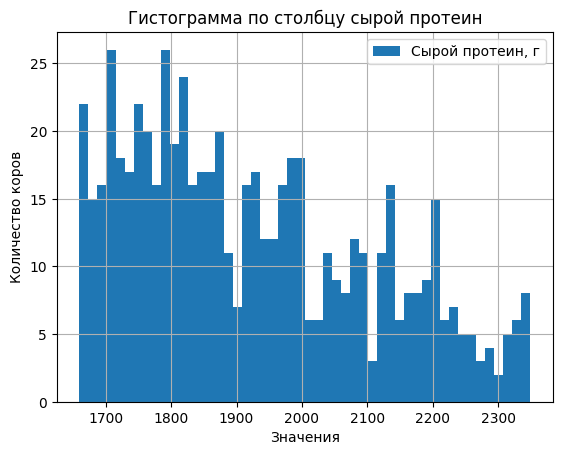

In [18]:
df_main.plot(y = 'Сырой протеин, г', kind = 'hist', bins = 50, grid=True, title = 'Гистограмма по столбцу сырой протеин')
plt.xlabel('Значения')
plt.ylabel('Количество коров')
df_main['Сырой протеин, г'].describe()

Среднее значение Сырого протеина - 1923, самое популярное значение около 1700, распределение нормальное, хоть и спадает от меньшого к большого, это скорее всего связано с тем, что, чем больше корова, тем больше на нее надо еды, а больших коров меньше, чем маленьких.

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: СПО (Сахаро-протеиновое соотношение), dtype: float64

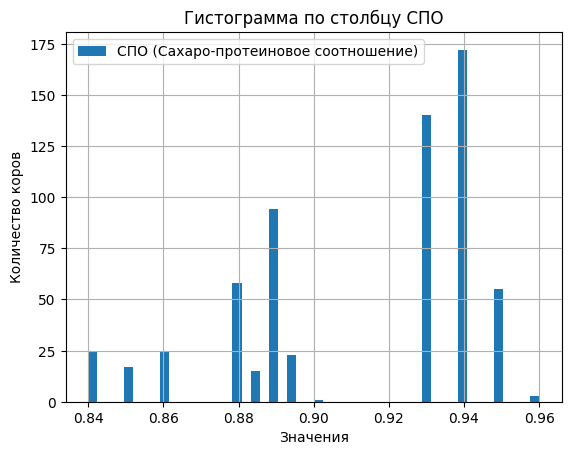

In [19]:
df_main.plot(y = 'СПО (Сахаро-протеиновое соотношение)', kind = 'hist', bins = 50, grid=True, title = 'Гистограмма по столбцу СПО')
plt.xlabel('Значения')
plt.ylabel('Количество коров')
df_main['СПО (Сахаро-протеиновое соотношение)'].describe()

Среднее значение СПО - 0.91, самое популярное значение около 0.94, распределение нормальное.

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: Жирность,%, dtype: float64

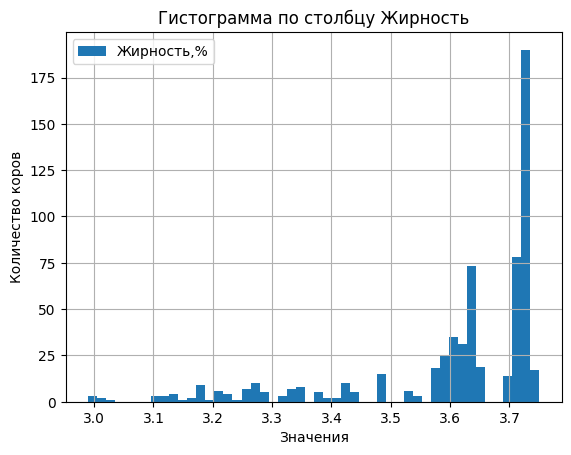

In [20]:
df_main.plot(y = 'Жирность,%', kind = 'hist', bins = 50, grid=True, title = 'Гистограмма по столбцу Жирность')
plt.xlabel('Значения')
plt.ylabel('Количество коров')
df_main['Жирность,%'].describe()

Среднее значение Жирности - 3.6, самое популярное значение около 3.7, распределение нормальное, в стаде явно преобладают коровы, которые дают молоко 3.6 жирности и выше.

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: Белок,%, dtype: float64

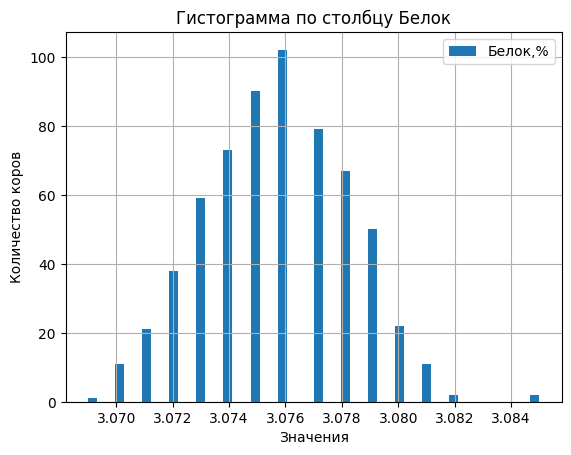

In [21]:
df_main.plot(y = 'Белок,%', kind = 'hist', bins = 50, grid=True, title = 'Гистограмма по столбцу Белок')
plt.xlabel('Значения')
plt.ylabel('Количество коров')
df_main['Белок,%'].describe()

Среднее значение Жирности - 3.075, самое популярное значение около 3.075, распределение нормальное.

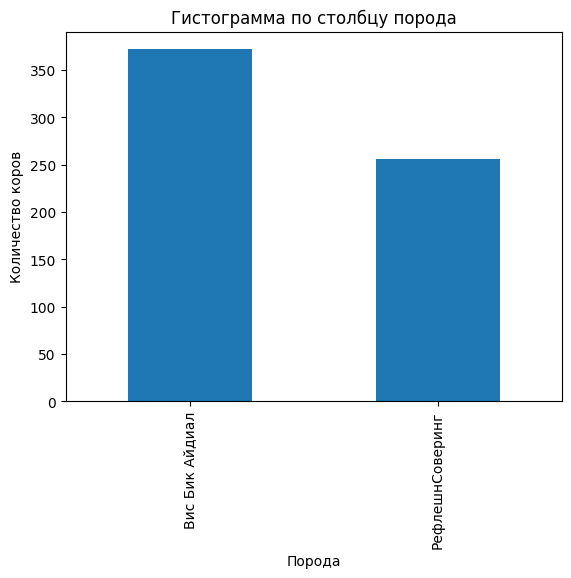

In [22]:
df_main['Порода'].value_counts().plot(kind = 'bar', title = 'Гистограмма по столбцу порода')
plt.xlabel('Порода')
plt.ylabel('Количество коров')
plt.show()

На пастбище имеются всего 2 вида коров, и порода Вис Бик Айдиал, явно преобладает над своим оппонентом.

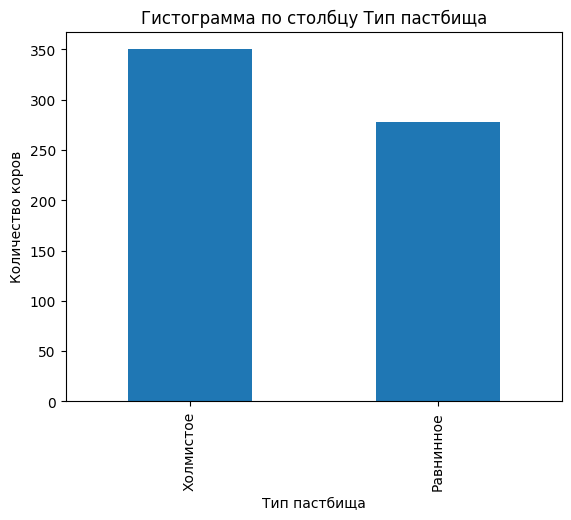

In [23]:
df_main['Тип пастбища'].value_counts().plot(kind = 'bar', title = 'Гистограмма по столбцу Тип пастбища')
plt.xlabel('Тип пастбища')
plt.ylabel('Количество коров')
plt.show()

В основном коровы пасутся на холмах, хотя равнин тоже немало

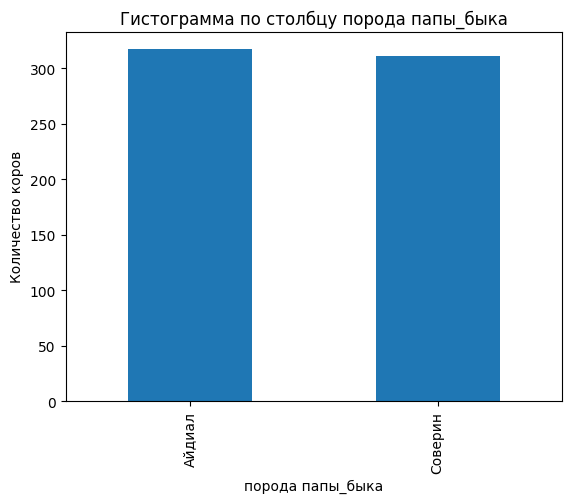

In [24]:
df_main['порода папы_быка'].value_counts().plot(kind = 'bar', title = 'Гистограмма по столбцу порода папы_быка')
plt.xlabel('порода папы_быка')
plt.ylabel('Количество коров')
plt.show()

Количество отцов по каждой породе, пркатически идентично, но породы Айдиал немного больше.

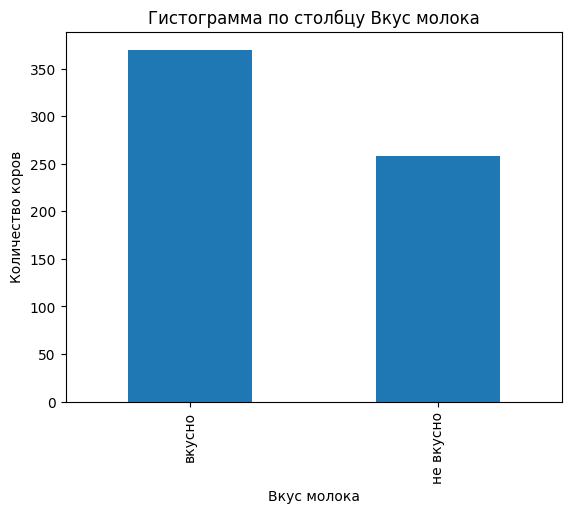

In [25]:
df_main['Вкус молока'].value_counts().plot(kind = 'bar', title = 'Гистограмма по столбцу Вкус молока')
plt.xlabel('Вкус молока')
plt.ylabel('Количество коров')
plt.show()

Производится больше вкусного молока, чем невкусного.

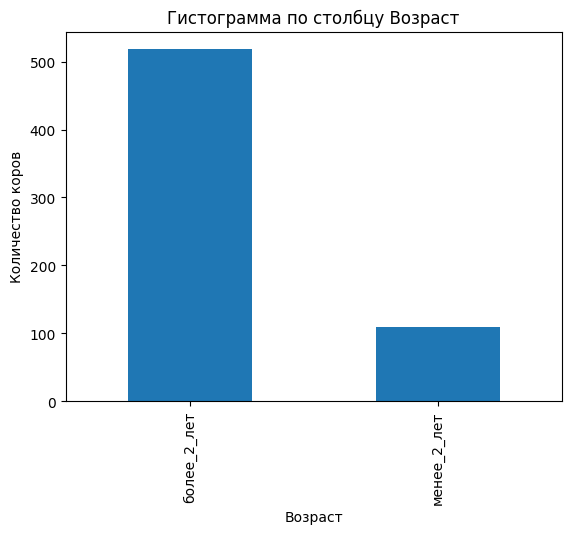

In [26]:
df_main['Возраст'].value_counts().plot(kind = 'bar', title = 'Гистограмма по столбцу Возраст')
plt.xlabel('Возраст')
plt.ylabel('Количество коров')
plt.show()

В основном, коровам больше 2-х лет, с молодыми коровами большая проблема.

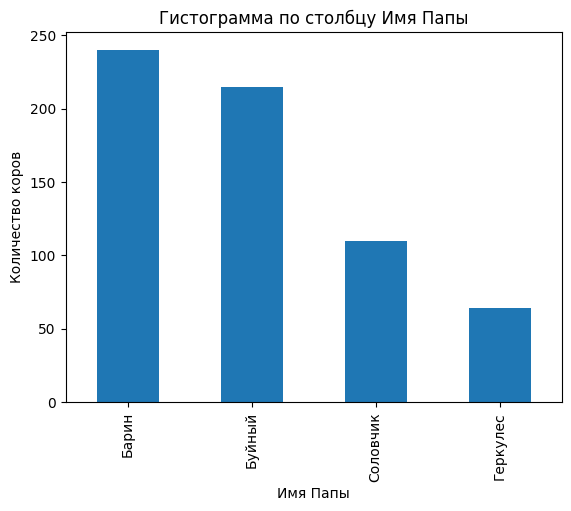

In [27]:
df_dad['Имя Папы'].value_counts().plot(kind = 'bar', title = 'Гистограмма по столбцу Имя Папы')
plt.xlabel('Имя Папы')
plt.ylabel('Количество коров')
plt.show()

Все коровы на пастбище произошли от 4 отцов, самыми плодовитыми оказались Барин и Буйный.

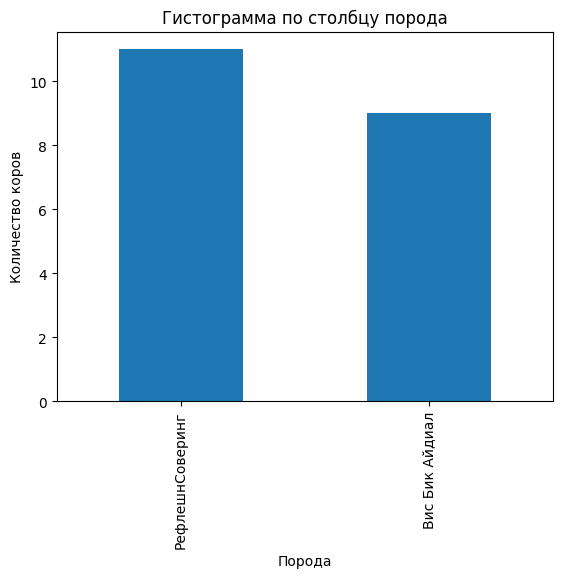

In [28]:
#Тепер проанализируем данные о о коровах «ЭкоФермы»
df_buy['Порода'].value_counts().plot(kind = 'bar', title = 'Гистограмма по столбцу порода')
plt.xlabel('Порода')
plt.ylabel('Количество коров')
plt.show()

Зеркальная ситуация с нашей фермой, порода Вис Бик Айдиал уступает.

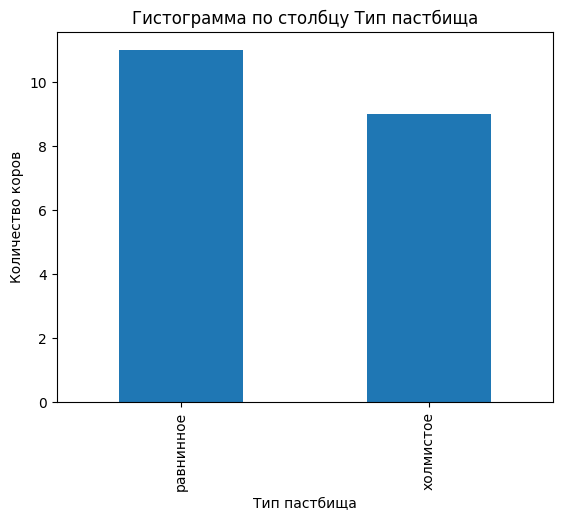

In [29]:
df_buy['Тип пастбища'].value_counts().plot(kind = 'bar', title = 'Гистограмма по столбцу Тип пастбища')
plt.xlabel('Тип пастбища')
plt.ylabel('Количество коров')
plt.show()

Преобладает равнинный тип пастбища, но не слишком сильно, для нашей фермы это не будет трудностью.

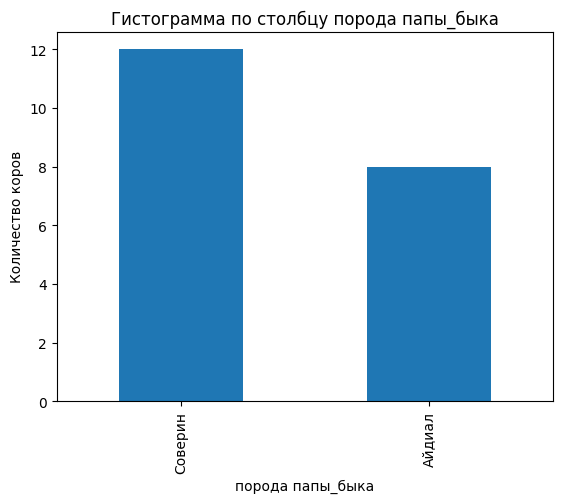

In [30]:
df_buy['порода папы_быка'].value_counts().plot(kind = 'bar', title = 'Гистограмма по столбцу порода папы_быка')
plt.xlabel('порода папы_быка')
plt.ylabel('Количество коров')
plt.show()

Порода Северин у папы быка сильно преобладает, что отлично от нашей фермы.

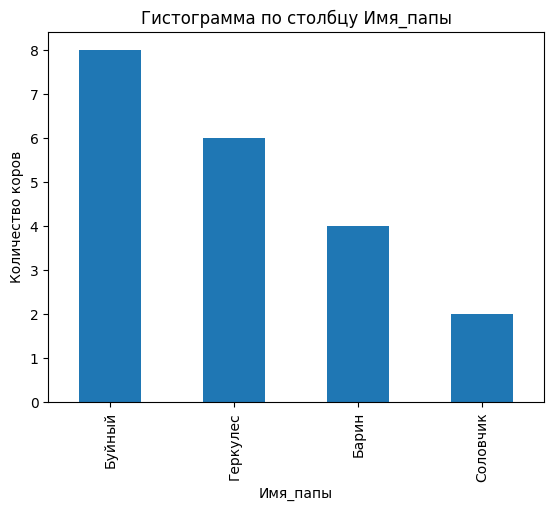

In [31]:
df_buy['Имя_папы'].value_counts().plot(kind = 'bar', title = 'Гистограмма по столбцу Имя_папы')
plt.xlabel('Имя_папы')
plt.ylabel('Количество коров')
plt.show()

Единственное, что можно подметить, значительное потомство пошло от геркулеса, что является отличным от ситуации на нашей ферме.

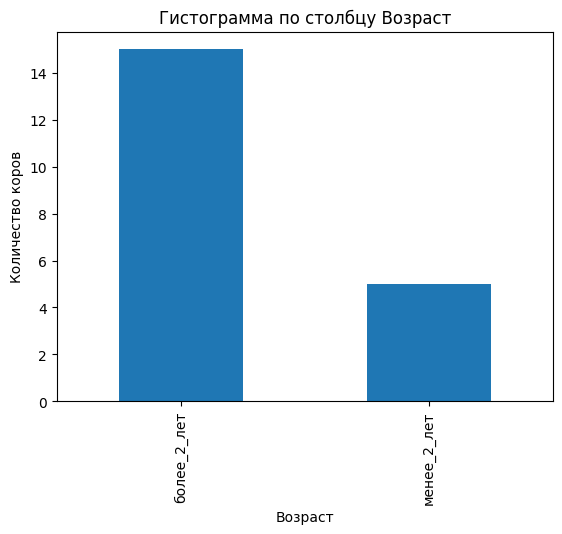

In [32]:
df_buy['Возраст'].value_counts().plot(kind = 'bar', title = 'Гистограмма по столбцу Возраст')
plt.xlabel('Возраст')
plt.ylabel('Количество коров')
plt.show()

Как и у нас, преобладают взрослые коровы, с молодыми проблемы.

count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: Текущая_жирность,%, dtype: float64

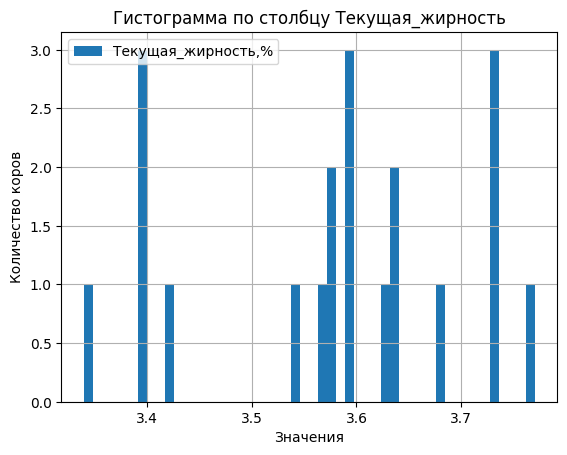

In [33]:
df_buy.plot(y = 'Текущая_жирность,%', kind = 'hist', bins = 50, grid=True, title = 'Гистограмма по столбцу Текущая_жирность')
plt.xlabel('Значения')
plt.ylabel('Количество коров')
df_buy['Текущая_жирность,%'].describe()

Чуть ниже средняя жирность, чем на нашей ферме - 3.57, но главное это большое количество коров с жирностью около 3.4, что очень отличается от показателей нашей фермы.

count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: Текущий_уровень_белок,%, dtype: float64

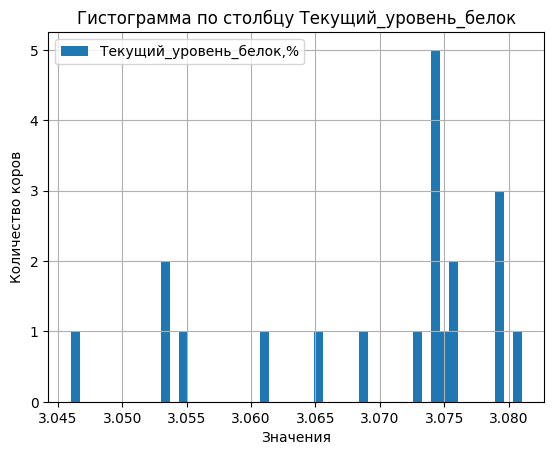

In [34]:
df_buy.plot(y = 'Текущий_уровень_белок,%', kind = 'hist', bins = 50, grid=True, title = 'Гистограмма по столбцу Текущий_уровень_белок')
plt.xlabel('Значения')
plt.ylabel('Количество коров')
df_buy['Текущий_уровень_белок,%'].describe()

Распределение не похоже на наше (скорее всего из-за сильно меньшей выборки), но значения схожи.

Вывод: Сильных аномалий в данных на этом этапе не обнаружено, все промежуточные выводы отмечены выше.

## Корреляционный анализ

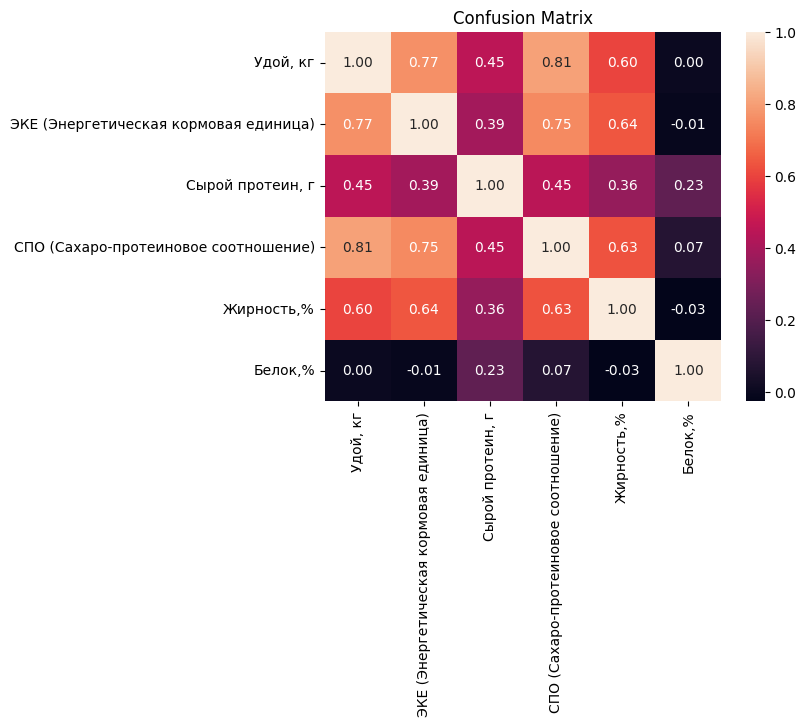

In [35]:
#делаем отдельный датафрейм, для построение тпеловой карты
columns_to_remove = ['id', 'index']
df_main_= df_main.drop(columns=columns_to_remove)
# построение тепловой карты
numerical_df = df_main_.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f')
plt.title('Confusion Matrix')
plt.show()

Видим достаточно большую корреляцию нашего целевого признака (Удой) с входными признаками связанными с качеством питания. Я заметил мультиколлинеарность в отношении признаков, связанных с качеством питания, так как между ними достаточно высокая кореляция, которая не обьясняется, так как переменнные независимы.

In [36]:
# Сначала преобразуйте категориальные признаки в one-hot encoding, как описано выше
categorical_features = ['Порода', 'Тип пастбища', 'порода папы_быка', 'Вкус молока', 'Возраст']
num_features = ['Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']

data_encoded = pd.get_dummies(df_main, columns=categorical_features)

# Затем объедините закодированные данные с числовыми данными
all_data = pd.concat([data_encoded, df_main[num_features]])

# Создайте отчет о корреляции
phik_corr_matrix = phik_matrix(all_data)

phik_corr_matrix

interval columns not set, guessing: ['index', 'id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']


,index,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%",Порода_Вис Бик Айдиал,Порода_РефлешнСоверинг,Тип пастбища_Равнинное,Тип пастбища_Холмистое,порода папы_быка_Айдиал,порода папы_быка_Соверин,Вкус молока_вкусно,Вкус молока_не вкусно,Возраст_более_2_лет,Возраст_менее_2_лет
index,1.000000,1.000000,0.000000,0.000000,0.115822,0.382303,0.519949,0.000000,0.611843,0.611843,0.037776,0.037776,0.320977,0.320977,0.039659,0.039659,0.000000,0.000000
id,1.000000,1.000000,0.000000,0.000000,0.115822,0.382303,0.519949,0.000000,0.611843,0.611843,0.037776,0.037776,0.320977,0.320977,0.039659,0.039659,0.000000,0.000000
"Удой, кг",0.000000,0.000000,1.000000,0.735150,0.511501,0.669608,0.723246,0.273122,0.164744,0.164744,0.279540,0.279540,0.519915,0.519915,0.173122,0.173122,0.998101,0.998101
ЭКЕ (Энергетическая кормовая единица),0.000000,0.000000,0.735150,1.000000,0.506038,0.603101,0.730766,0.182524,0.123086,0.123086,0.106758,0.106758,0.171355,0.171355,0.272265,0.272265,0.771596,0.771596
"Сырой протеин, г",0.115822,0.115822,0.511501,0.506038,1.000000,0.416035,0.459300,0.327865,0.090925,0.090925,0.096474,0.096474,0.000000,0.000000,0.176480,0.176480,0.351685,0.351685
СПО (Сахаро-протеиновое соотношение),0.382303,0.382303,0.669608,0.603101,0.416035,1.000000,0.654582,0.190796,0.062660,0.062660,0.155349,0.155349,0.425601,0.425601,0.572702,0.572702,0.744410,0.744410
"Жирность,%",0.519949,0.519949,0.723246,0.730766,0.459300,0.654582,1.000000,0.263855,0.222825,0.222825,0.000000,0.000000,0.000000,0.000000,0.198793,0.198793,0.677913,0.677913
"Белок,%",0.000000,0.000000,0.273122,0.182524,0.327865,0.190796,0.263855,1.000000,0.361851,0.361851,0.099908,0.099908,0.134582,0.134582,0.143857,0.143857,0.000000,0.000000
Порода_Вис Бик Айдиал,0.611843,0.611843,0.164744,0.123086,0.090925,0.062660,0.222825,0.361851,1.000000,0.999987,0.213218,0.213218,0.089330,0.089330,0.000000,0.000000,0.057295,0.057295
Порода_РефлешнСоверинг,0.611843,0.611843,0.164744,0.123086,0.090925,0.062660,0.222825,0.361851,0.999987,1.000000,0.213218,0.213218,0.089330,0.089330,0.000000,0.000000,0.057295,0.057295


Благодаря матрицы phik так же видно корреляцию целевого признака Удой еще и с жирностью и Возрастом коровы.

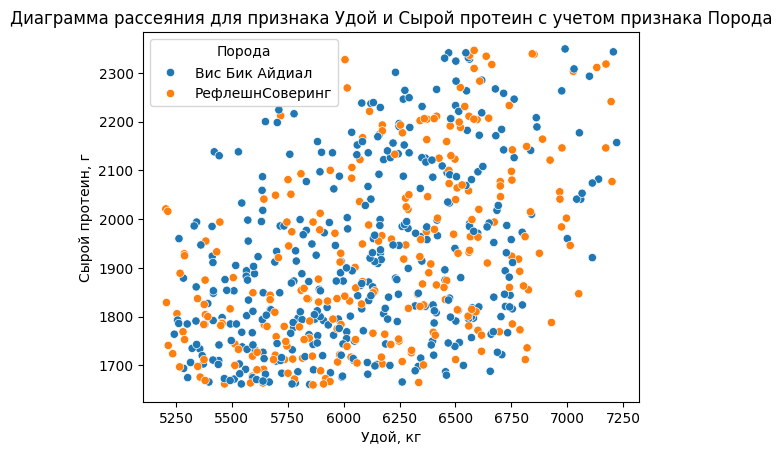

In [37]:
#Строим диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков
sns.scatterplot(x='Удой, кг', y='Сырой протеин, г', hue='Порода', data=df_main)
plt.title('Диаграмма рассеяния для признака Удой и Сырой протеин с учетом признака Порода')
plt.show()

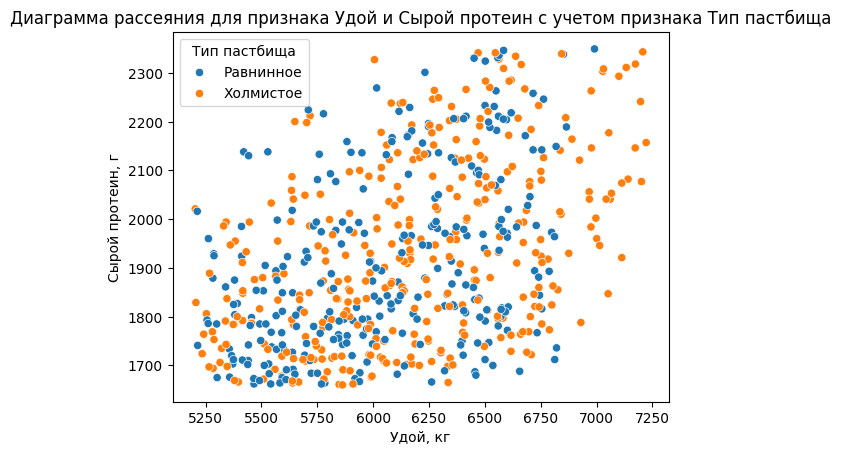

In [38]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['Сырой протеин, г'], hue=df_main['Тип пастбища'])
plt.title('Диаграмма рассеяния для признака Удой и Сырой протеин с учетом признака Тип пастбища')
plt.show()

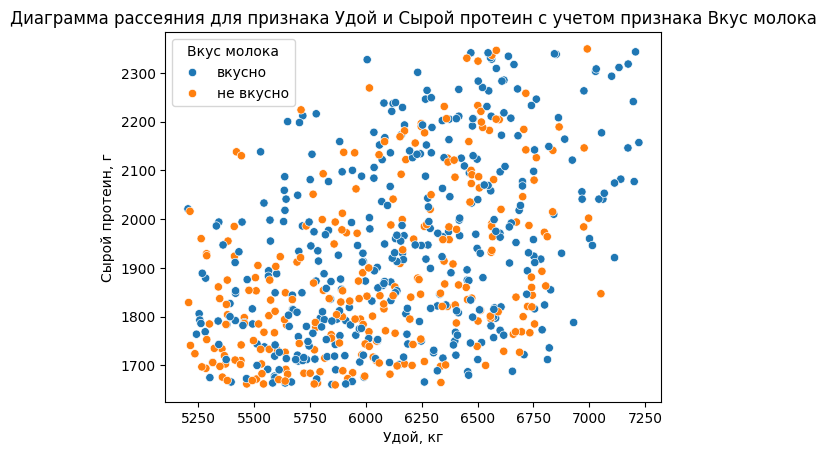

In [39]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['Сырой протеин, г'], hue=df_main['Вкус молока'])
plt.title('Диаграмма рассеяния для признака Удой и Сырой протеин с учетом признака Вкус молока')
plt.show()

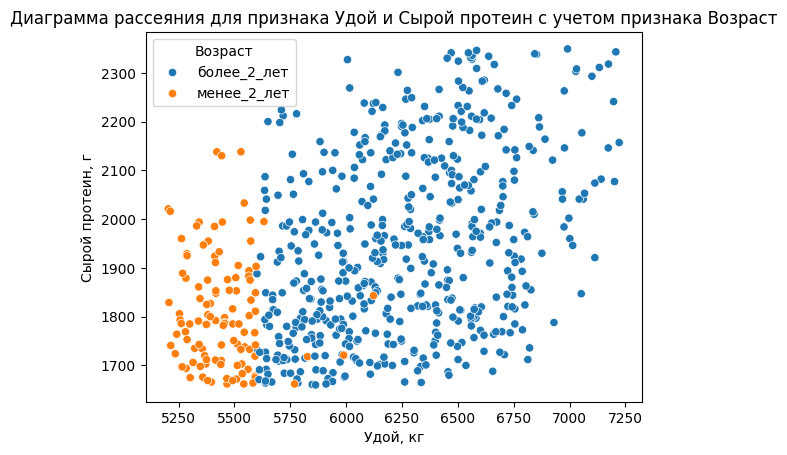

In [40]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['Сырой протеин, г'], hue=df_main['Возраст'])
plt.title('Диаграмма рассеяния для признака Удой и Сырой протеин с учетом признака Возраст')
plt.show()

Никакой зависимости между признаками не наблюдается, единственное, что можно отметить по графикам - коровы меньше 2-х лет, дают сильно меньше удоя, чем другие.

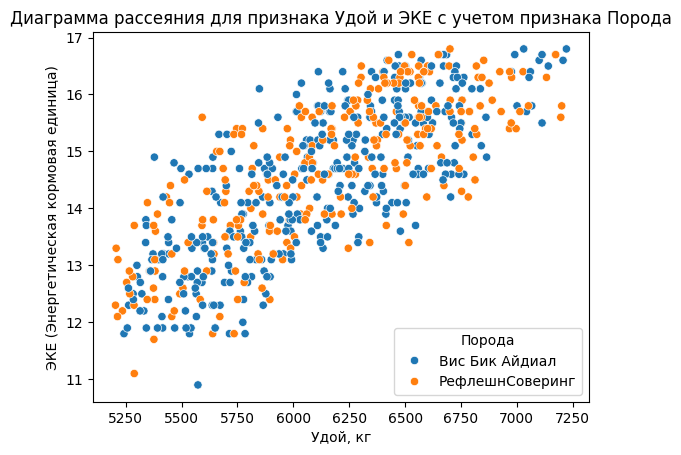

In [41]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['ЭКЕ (Энергетическая кормовая единица)'], hue=df_main['Порода'])
plt.title('Диаграмма рассеяния для признака Удой и ЭКЕ с учетом признака Порода')
plt.show()

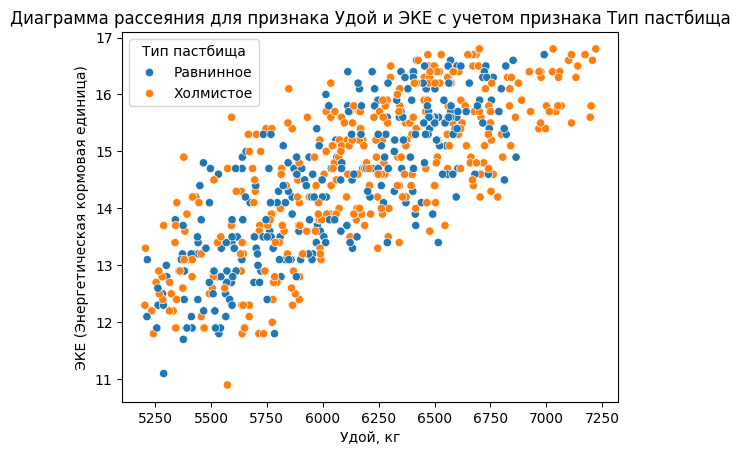

In [42]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['ЭКЕ (Энергетическая кормовая единица)'], hue=df_main['Тип пастбища'])
plt.title('Диаграмма рассеяния для признака Удой и ЭКЕ с учетом признака Тип пастбища')
plt.show()

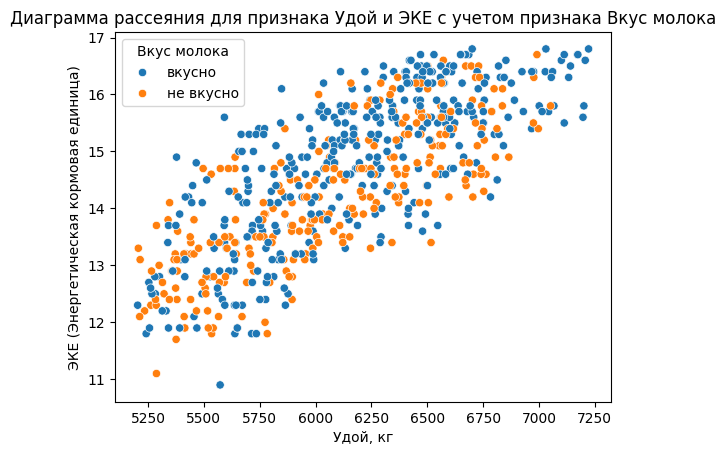

In [43]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['ЭКЕ (Энергетическая кормовая единица)'], hue=df_main['Вкус молока'])
plt.title('Диаграмма рассеяния для признака Удой и ЭКЕ с учетом признака Вкус молока')
plt.show()

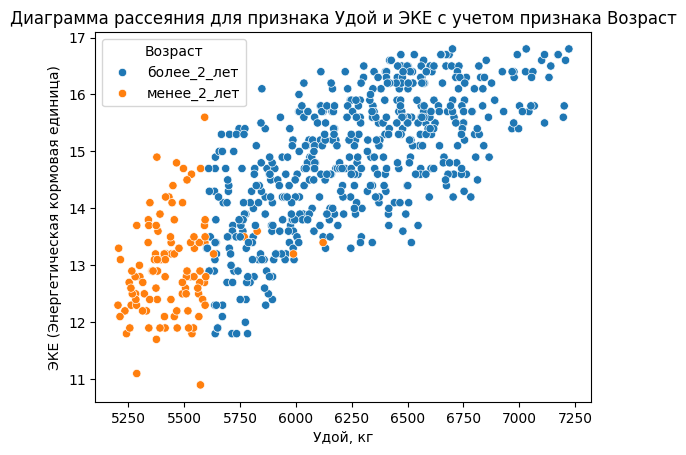

In [44]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['ЭКЕ (Энергетическая кормовая единица)'], hue=df_main['Возраст'])
plt.title('Диаграмма рассеяния для признака Удой и ЭКЕ с учетом признака Возраст')
plt.show()

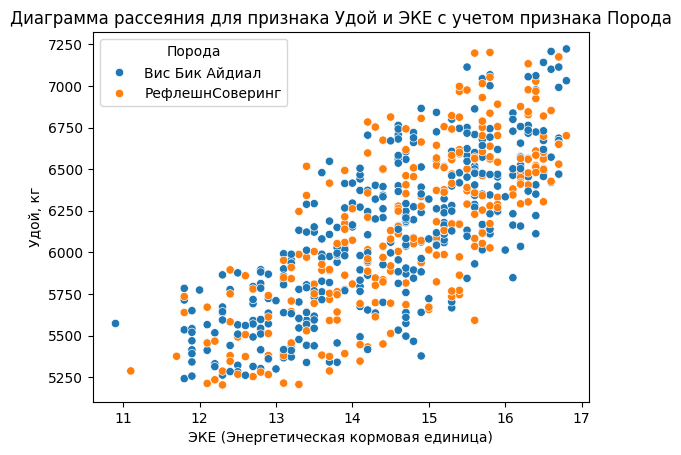

In [45]:
sns.scatterplot(x=df_main['ЭКЕ (Энергетическая кормовая единица)'], y=df_main['Удой, кг'], hue=df_main['Порода'])
plt.title('Диаграмма рассеяния для признака Удой и ЭКЕ с учетом признака Порода')
plt.show()

Между признаками наблюдается нелинейная зависимость (для ее наглядности сделал последний график, где поменял x и y местами). Новых закономерностей с категориальными признаками не обнаружено.

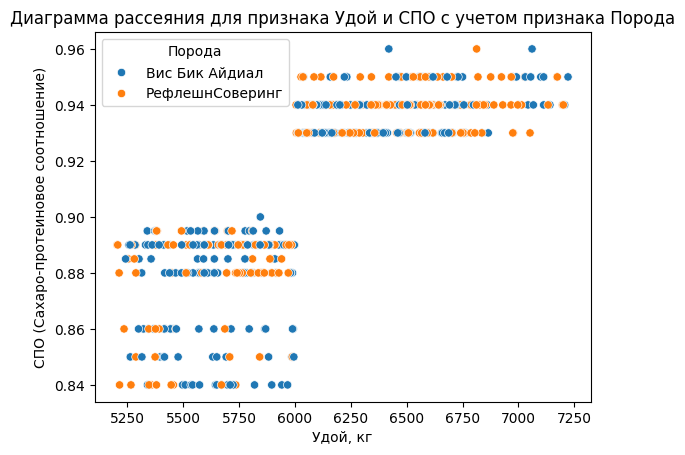

In [46]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['СПО (Сахаро-протеиновое соотношение)'], hue=df_main['Порода'])
plt.title('Диаграмма рассеяния для признака Удой и СПО с учетом признака Порода')
plt.show()

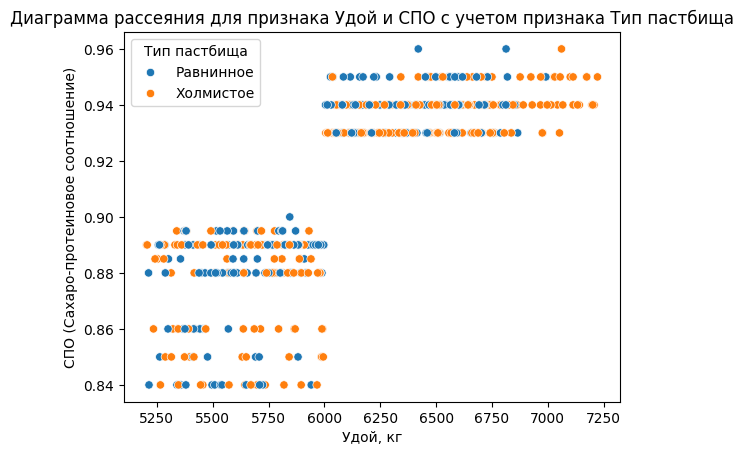

In [47]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['СПО (Сахаро-протеиновое соотношение)'], hue=df_main['Тип пастбища'])
plt.title('Диаграмма рассеяния для признака Удой и СПО с учетом признака Тип пастбища')
plt.show()

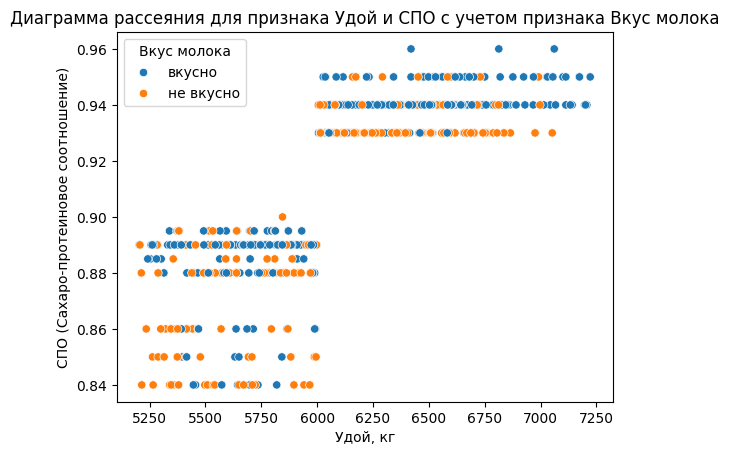

In [48]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['СПО (Сахаро-протеиновое соотношение)'], hue=df_main['Вкус молока'])
plt.title('Диаграмма рассеяния для признака Удой и СПО с учетом признака Вкус молока')
plt.show()

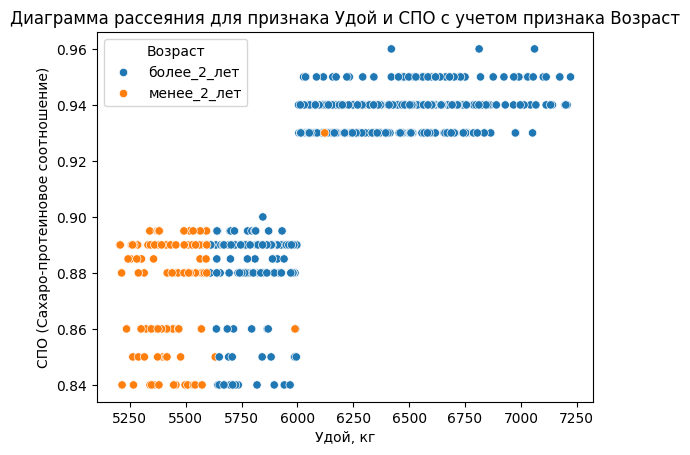

In [49]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['СПО (Сахаро-протеиновое соотношение)'], hue=df_main['Возраст'])
plt.title('Диаграмма рассеяния для признака Удой и СПО с учетом признака Возраст')
plt.show()

Большое количество пропущенных значений в середине усложняют оценку, но зависимость близка к нелинейной. Чем меньше корова, тем меньше ей дают сахара в отношении к протеину.

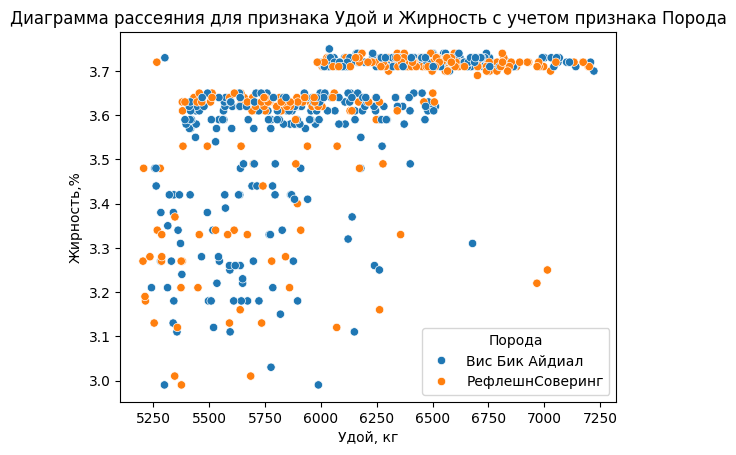

In [50]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['Жирность,%'], hue=df_main['Порода'])
plt.title('Диаграмма рассеяния для признака Удой и Жирность с учетом признака Порода')
plt.show()

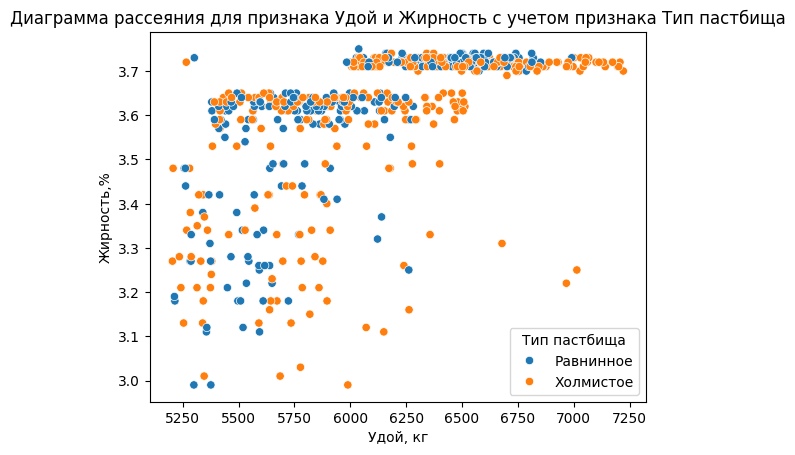

In [51]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['Жирность,%'], hue=df_main['Тип пастбища'])
plt.title('Диаграмма рассеяния для признака Удой и Жирность с учетом признака Тип пастбища')
plt.show()

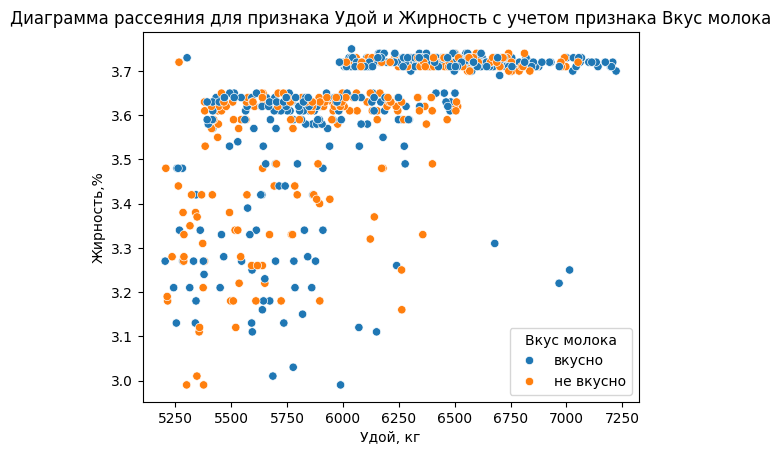

In [52]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['Жирность,%'], hue=df_main['Вкус молока'])
plt.title('Диаграмма рассеяния для признака Удой и Жирность с учетом признака Вкус молока')
plt.show()

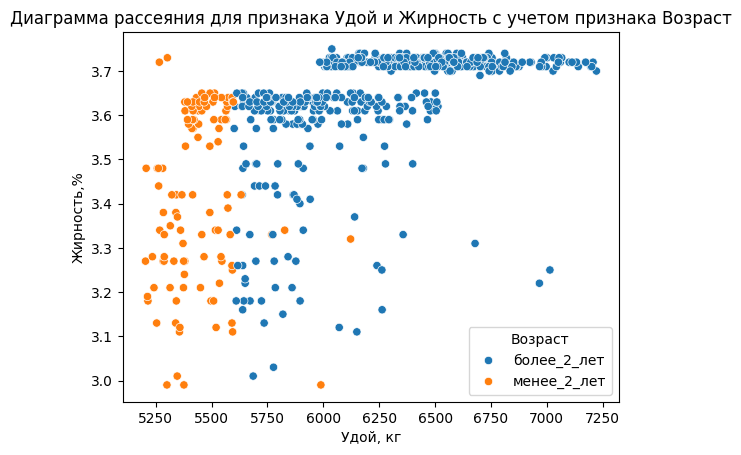

In [53]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['Жирность,%'], hue=df_main['Возраст'])
plt.title('Диаграмма рассеяния для признака Удой и Жирность с учетом признака Возраст')
plt.show()

Зависимости между признаками не обнаружено, наглядно видно, насколько больше собирается молока 3.6+ жирности, чем другого.

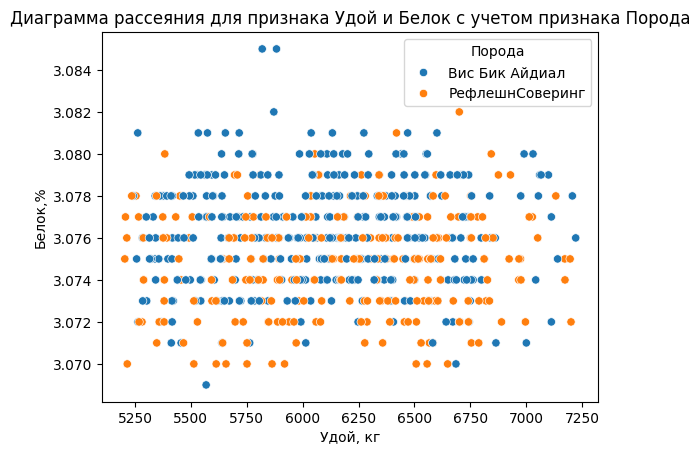

In [54]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['Белок,%'], hue=df_main['Порода'])
plt.title('Диаграмма рассеяния для признака Удой и Белок с учетом признака Порода')
plt.show()

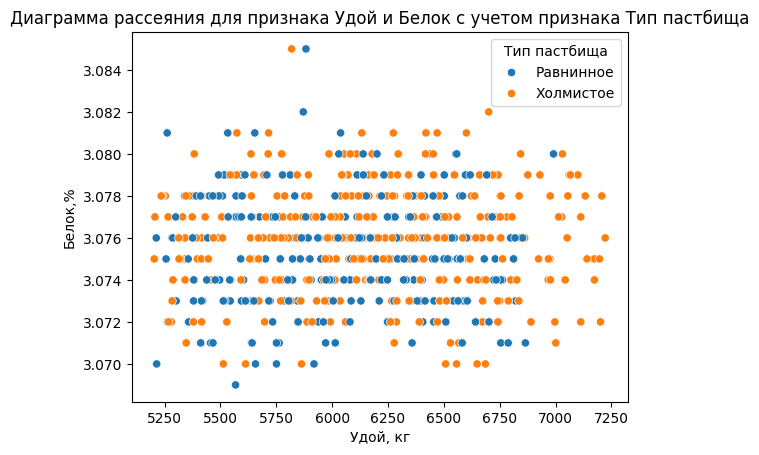

In [55]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['Белок,%'], hue=df_main['Тип пастбища'])
plt.title('Диаграмма рассеяния для признака Удой и Белок с учетом признака Тип пастбища')
plt.show()

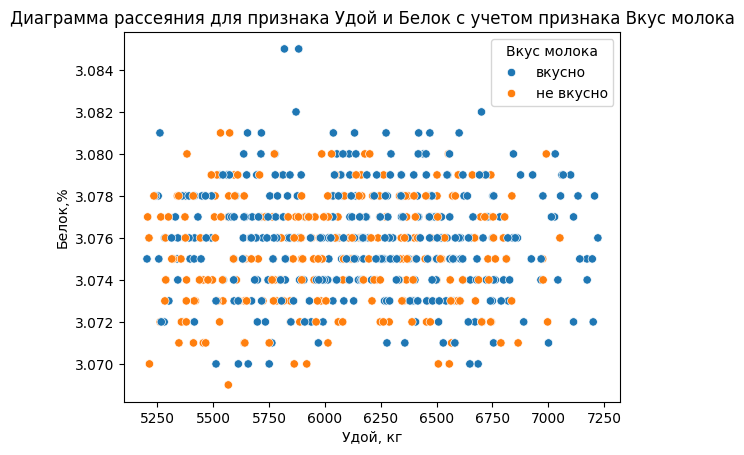

In [56]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['Белок,%'], hue=df_main['Вкус молока'])
plt.title('Диаграмма рассеяния для признака Удой и Белок с учетом признака Вкус молока')
plt.show()

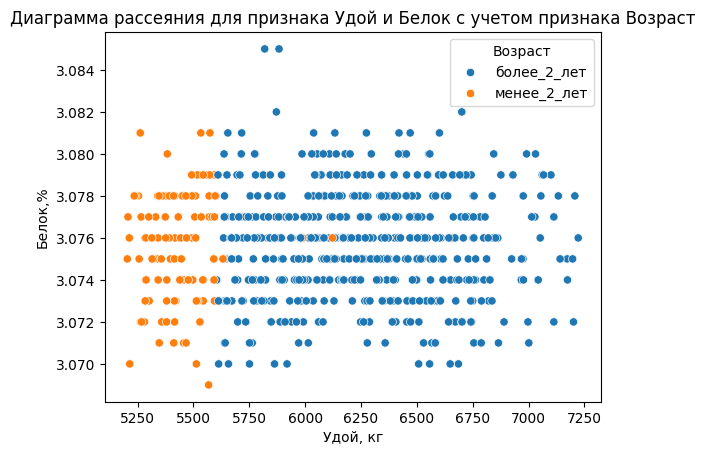

In [57]:
sns.scatterplot(x=df_main['Удой, кг'], y=df_main['Белок,%'], hue=df_main['Возраст'])
plt.title('Диаграмма рассеяния для признака Удой и Белок с учетом признака Возраст')
plt.show()

Зависимости между признаками не обнаружено. Новых закономерностей с категориальными признаками не обнаружено.

Вывод: Были обанружены зависимости между признаками связаными с качеством корма с удоем.Благодаря матрицы phik так же видно корреляцию целевого признака Удой еще и с жирностью и Возрастом коровы. Между СПО и удоем линейная зависимость. Между ЭКЕ и удоем - нелинейная. Так же обнаружена мультиколлинеарность между ЭКЕ и СПО. Так же было обнаружено, что чем моложе корова, тем меньше удой.

## Обучение модели линейной регрессии

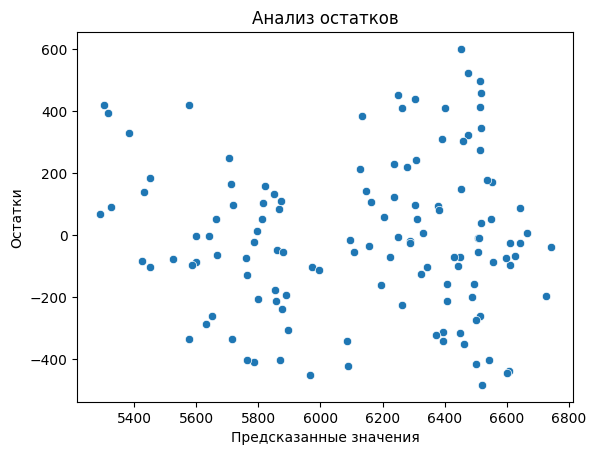

Значение R² модели: 0.7081182129534311
Остатки графически показывают случайное распределение, что хорошо.


In [58]:
# Выбор целевого признака
target = df_main['Удой, кг']

# Отбор признаков
features = df_main[['СПО (Сахаро-протеиновое соотношение)', 'ЭКЕ (Энергетическая кормовая единица)', 'Порода', 'Тип пастбища']]

# Разбиение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Кодирование категориальных признаков с помощью OneHotEncoder
encoder = OneHotEncoder(drop='first')
X_train_encoded = encoder.fit_transform(X_train[['Порода', 'Тип пастбища']])
X_test_encoded = encoder.transform(X_test[['Порода', 'Тип пастбища']])
X_train_encoded = X_train_encoded.toarray()
X_test_encoded = X_test_encoded.toarray()

# Масштабирование количественных признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['СПО (Сахаро-протеиновое соотношение)', 'ЭКЕ (Энергетическая кормовая единица)']])
X_test_scaled = scaler.transform(X_test[['СПО (Сахаро-протеиновое соотношение)', 'ЭКЕ (Энергетическая кормовая единица)']])

# Объединение закодированных и масштабированных признаков
X_train_final = pd.concat([pd.DataFrame(X_train_scaled, columns=['СПО (Сахаро-протеиновое соотношение)', 'ЭКЕ (Энергетическая кормовая единица)']), pd.DataFrame(X_train_encoded)], axis=1)
X_test_final = pd.concat([pd.DataFrame(X_test_scaled, columns=['СПО (Сахаро-протеиновое соотношение)', 'ЭКЕ (Энергетическая кормовая единица)']), pd.DataFrame(X_test_encoded)], axis=1)
X_train_final.columns = X_train_final.columns.astype(str)
X_test_final.columns = X_test_final.columns.astype(str)


# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_final, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_final)

# Расчет R²
r2 = r2_score(y_test, y_pred)

# Анализ остатков
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("Анализ остатков")
plt.show()

# Выводы
print("Значение R² модели:", r2)
print("Остатки графически показывают случайное распределение, что хорошо.")

Выводы:

Значение R² модели позволяет оценить, насколько хорошо модель соответствует данным. Чем ближе R² к 1, тем лучше.
График остатков показывает, что они случайно распределены, что также хорошо. Это говорит о том, что модель хорошо описывает данные.

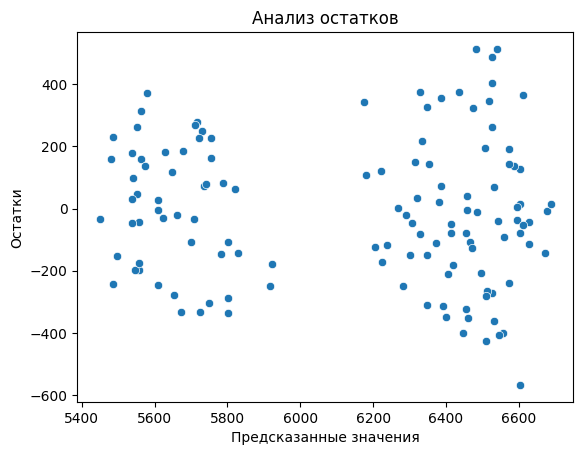

Значение R² второй модели: 0.7506296804995728
Остатки графически показывают случайное распределение, что хорошо.


In [59]:
# Преобразование признака СПО в бинарный категориальный признак
df_main['СПО_bin'] = (df_main['СПО (Сахаро-протеиновое соотношение)'] > 0.92).astype(int)

# Введение нового признака "ЭКЕ^2"
df_main['ЭКЕ^2'] = df_main['ЭКЕ (Энергетическая кормовая единица)'] ** 2

# Отбор признаков
features1 = df_main[['СПО_bin', 'ЭКЕ^2', 'Порода', 'Тип пастбища']]

# Разбиение данных на тренировочную и тестовую выборки
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, target, test_size=0.2, random_state=42)

# Кодирование категориальных признаков с помощью OneHotEncoder
encoder = OneHotEncoder(drop='first')
X_train_encoded1 = encoder.fit_transform(X_train1[['Порода', 'Тип пастбища']])
X_test_encoded1 = encoder.transform(X_test1[['Порода', 'Тип пастбища']])
X_train_encoded1 = X_train_encoded1.toarray()
X_test_encoded1 = X_test_encoded1.toarray()

# Масштабирование количественных признаков
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1[['СПО_bin', 'ЭКЕ^2']])
X_test_scaled1 = scaler.transform(X_test1[['СПО_bin', 'ЭКЕ^2']])

# Объединение закодированных и масштабированных признаков
X_train_final1 = pd.concat([pd.DataFrame(X_train_scaled1, columns=['СПО_bin', 'ЭКЕ^2']), pd.DataFrame(X_train_encoded1)], axis=1)
X_test_final1 = pd.concat([pd.DataFrame(X_test_scaled1, columns=['СПО_bin', 'ЭКЕ^2']), pd.DataFrame(X_test_encoded1)], axis=1)
X_train_final1.columns = X_train_final1.columns.astype(str)
X_test_final1.columns = X_test_final1.columns.astype(str)

# Обучение модели линейной регрессии
model1 = LinearRegression()
model1.fit(X_train_final1, y_train1)

# Предсказание на тестовой выборке
y_pred1 = model1.predict(X_test_final1)

# Расчет R²
r2_1 = r2_score(y_test1, y_pred1)

# Анализ остатков
residuals1 = y_test1 - y_pred1
sns.scatterplot(x=y_pred1, y=residuals1)
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("Анализ остатков")
plt.show()

# Выводы
print("Значение R² второй модели:", r2_1)
print("Остатки графически показывают случайное распределение, что хорошо.")

Выводы:

Значение R² второй модели позволяет оценить, насколько хорошо модель соответствует данным после устранения нелинейности.
График остатков показывает, что они случайно распределены, что также хорошо. Это говорит о том, что модель хорошо описывает данные после преобразования признаков.
В результате преобразования признаков и обучения второй модели удалось улучшить качество модели линейной регрессии.

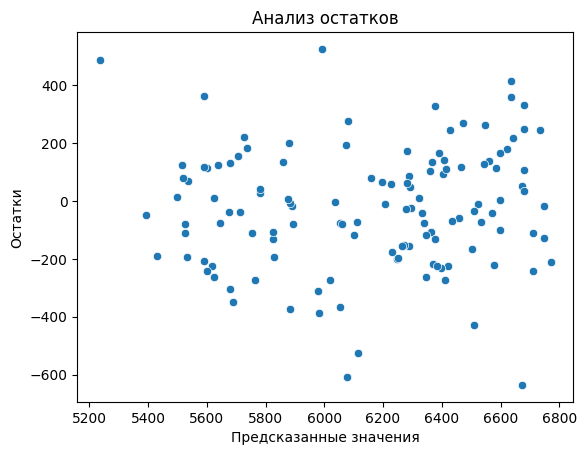

Значение R² третьей модели: 0.786938640364102
Остатки графически показывают случайное распределение, что хорошо.


In [60]:
# Соединение данных по ключу "id"
df_combined = df_main.merge(df_dad, on='id', how='inner')
#Удаляем пропущенные значения
df_combined = df_combined.dropna(subset=['Порода'])
# Отбор признаков
features2 = df_combined[['СПО (Сахаро-протеиновое соотношение)', 'ЭКЕ (Энергетическая кормовая единица)', 'Порода', 'Тип пастбища', 'Имя Папы']]

# Разбиение данных на тренировочную и тестовую выборки
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target, test_size=0.2, random_state=42)

# Кодирование категориальных признаков с помощью OneHotEncoder
encoder = OneHotEncoder(drop='first')
X_train_encoded2 = encoder.fit_transform(X_train2[['Порода', 'Тип пастбища', 'Имя Папы']])
X_test_encoded2 = encoder.transform(X_test2[['Порода', 'Тип пастбища', 'Имя Папы']])
X_train_encoded2 = X_train_encoded2.toarray()
X_test_encoded2 = X_test_encoded2.toarray()

# Масштабирование количественных признаков
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2[['СПО (Сахаро-протеиновое соотношение)', 'ЭКЕ (Энергетическая кормовая единица)']])
X_test_scaled2 = scaler.transform(X_test2[['СПО (Сахаро-протеиновое соотношение)', 'ЭКЕ (Энергетическая кормовая единица)']])

# Объединение закодированных и масштабированных признаков
X_train_final2 = pd.concat([pd.DataFrame(X_train_scaled2, columns=['СПО (Сахаро-протеиновое соотношение)', 'ЭКЕ (Энергетическая кормовая единица)']), pd.DataFrame(X_train_encoded2)], axis=1)
X_test_final2 = pd.concat([pd.DataFrame(X_test_scaled2, columns=['СПО (Сахаро-протеиновое соотношение)', 'ЭКЕ (Энергетическая кормовая единица)']), pd.DataFrame(X_test_encoded2)], axis=1)
X_train_final2.columns = X_train_final2.columns.astype(str)
X_test_final2.columns = X_test_final2.columns.astype(str)

# Обучение модели линейной регрессии
model2 = LinearRegression()
model2.fit(X_train_final2, y_train2)

# Предсказание на тестовой выборке
y_pred2 = model2.predict(X_test_final2)

# Расчет R²
r2_2 = r2_score(y_test2, y_pred2)

# Анализ остатков
residuals2 = y_test2 - y_pred2
sns.scatterplot(x=y_pred2, y=residuals2)
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("Анализ остатков")
plt.show()

# Выводы
print("Значение R² третьей модели:", r2_2)
print("Остатки графически показывают случайное распределение, что хорошо.")

Выводы:

Значение R² третьей модели позволяет оценить, насколько хорошо модель соответствует данным после добавления нового признака и обучения.
График остатков показывает, что они случайно распределены, что также хорошо. Это говорит о том, что модель хорошо описывает данные после добавления нового признака.
Добавление нового признака "Имя Папы" улучшило качество модели линейной регрессии, что может быть полезным для прогнозирования удоя коров.

Вторая и третья модели имеют близкие значения R², что означает, что они обе достаточно хорошо описывают данные.
Анализ остатков в обеих моделях показывает случайное распределение, что также говорит о хорошем соответствии моделей данным.
Вероятно 3 модель является самой эффективной.

In [61]:
#Сначала определим функции для расчета метрик
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, mae, rmse
# Расчет метрик для моделей
mse, mae, rmse = calculate_metrics(y_test, y_pred)
mse1, mae1, rmse1 = calculate_metrics(y_test1, y_pred1)
mse2, mae2, rmse2 = calculate_metrics(y_test2, y_pred2)

# Создадим DataFrame для удобного сравнения метрик
metrics_df = pd.DataFrame({
    'Модель': ['Модель 1', 'Модель 2', 'Модель 3'],
    'MSE': [mse, mse1, mse2],
    'MAE': [mae, mae1, mae2],
    'RMSE': [rmse, rmse1, rmse2]
})

metrics_df

,Модель,MSE,MAE,RMSE
0,Модель 1,60593.313588,195.915387,246.157091
1,Модель 2,51768.128878,185.678014,227.526106
2,Модель 3,44230.556173,166.245993,210.310618


По всем показателям лучшая модель - 3

In [62]:
# указываем доверительный интервал прогноза лучшей модели
confidence_interval = np.percentile(y_pred2, [2.5, 97.5])
confidence_interval

array([5501.42648243, 6730.0529131 ])

In [63]:
# Средние значения признаков ЭКЕ, Сырой протеин и СПО из ferma_main.csv
mean_ЭКЕ = 0.05 * df_main['ЭКЕ (Энергетическая кормовая единица)'].mean() + df_main['ЭКЕ (Энергетическая кормовая единица)'].mean()
mean_Сырой_протеин = 0.05 * df_main['Сырой протеин, г'].mean() + df_main['Сырой протеин, г'].mean()
mean_СПО = 0.05 * df_main['СПО (Сахаро-протеиновое соотношение)'].mean() + df_main['СПО (Сахаро-протеиновое соотношение)'].mean()

# Добавление недостающих признаков и увеличение их на 5%
df_buy['ЭКЕ (Энергетическая кормовая единица)'] = mean_ЭКЕ
df_buy['Сырой протеин, г'] = mean_Сырой_протеин
df_buy['СПО (Сахаро-протеиновое соотношение)'] = mean_СПО

# Отбор признаков
features_buy = df_buy[['СПО (Сахаро-протеиновое соотношение)', 'ЭКЕ (Энергетическая кормовая единица)', 'Порода', 'Тип пастбища', 'Имя_папы']]

# Кодирование категориальных признаков с помощью OneHotEncoder
encoder = OneHotEncoder(drop='first')
X_buy_encoded = encoder.fit_transform(features_buy[['Порода', 'Тип пастбища', 'Имя_папы']])
X_buy_encoded = X_buy_encoded.toarray()
# Масштабирование количественных признаков
X_buy_scaled = scaler.transform(features_buy[['СПО (Сахаро-протеиновое соотношение)', 'ЭКЕ (Энергетическая кормовая единица)']])

# Объединение закодированных и масштабированных признаков
X_buy_final = pd.concat([pd.DataFrame(X_buy_scaled, columns=['СПО (Сахаро-протеиновое соотношение)', 'ЭКЕ (Энергетическая кормовая единица)']),
                            pd.DataFrame(X_buy_encoded)], axis=1)
X_buy_final.columns = X_buy_final.columns.astype(str)

# Использование третьей модели для прогноза удоя коров
y_pred_buy = model2.predict(X_buy_final)

# Добавление прогнозов в данные коров, которых фермер хочет купить
df_buy['Прогноз_удоя, кг'] = y_pred_buy

# Вывод данных с прогнозами удоя
print(df_buy)

             Порода Тип пастбища порода папы_быка  Имя_папы  \
0    Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1    Вис Бик Айдиал    равнинное          Соверин    Буйный   
2   РефлешнСоверинг    равнинное          Соверин     Барин   
3   РефлешнСоверинг    холмистое           Айдиал    Буйный   
4   РефлешнСоверинг    равнинное           Айдиал    Буйный   
5   РефлешнСоверинг    равнинное          Соверин  Геркулес   
6    Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
7    Вис Бик Айдиал    равнинное          Соверин    Буйный   
8   РефлешнСоверинг    равнинное          Соверин     Барин   
9   РефлешнСоверинг    холмистое           Айдиал    Буйный   
10   Вис Бик Айдиал    холмистое          Соверин  Соловчик   
11  РефлешнСоверинг    равнинное          Соверин  Геркулес   
12   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
13   Вис Бик Айдиал    холмистое          Соверин     Барин   
14  РефлешнСоверинг    равнинное          Соверин     Б

По нашей модели, все коровы пройдут минимальный порог в 6000 кг удоя в год

Вывод: В данной части работы мы создали 3 прогнозные модели, на основе раззных факторов, выяснили, благодаря метрикам, что 3 модель работает лучше всего, и по ней, спрогнозировали, что все коровы, рассматриваемые для покупки преодалеют минимальной порог в 6000 кг удоя в год.

## Обучение модели логистической регрессии

Accuracy: 0.6031746031746031
Precision: 0.6185567010309279
Recall: 0.821917808219178
Матрица ошибок:


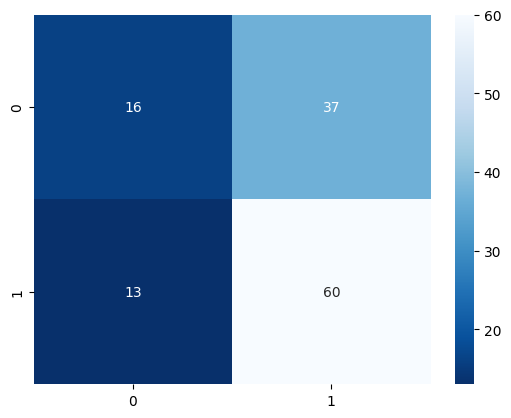

In [64]:
# Отбор признаков
features = df_main.drop(['id', 'Вкус молока'], axis=1)
target = df_main['Вкус молока']
target = target.map({'вкусно': 1, 'не вкусно': 0})

# Разбиение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Кодирование категориальных признаков с помощью OneHotEncoder
encoder = OneHotEncoder(drop='first')
X_train_encoded = encoder.fit_transform(X_train[['Порода', 'Тип пастбища', 'порода папы_быка', 'Возраст']])
X_test_encoded = encoder.transform(X_test[['Порода', 'Тип пастбища', 'порода папы_быка', 'Возраст']])
X_train_encoded = X_train_encoded.toarray()
X_test_encoded = X_test_encoded.toarray()

# Масштабирование количественных признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)',
                                                'Жирность,%', 'Белок,%']])
X_test_scaled = scaler.transform(X_test[['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)',
                                       'Жирность,%', 'Белок,%']])

# Объединение закодированных и масштабированных признаков
X_train_final = pd.concat([pd.DataFrame(X_train_scaled, columns=['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)',
                                                                 'Жирность,%', 'Белок,%']), pd.DataFrame(X_train_encoded)], axis=1)
X_test_final = pd.concat([pd.DataFrame(X_test_scaled, columns=['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)',
                                                              'Жирность,%', 'Белок,%']), pd.DataFrame(X_test_encoded)], axis=1)
X_train_final.columns = X_train_final.columns.astype(str)
X_test_final.columns = X_test_final.columns.astype(str)

# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train_final, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_final)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Построение матрицы ошибок
confusion = confusion_matrix(y_test, y_pred)

# Вывод результатов
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Матрица ошибок:")
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues_r')
plt.show()

Для заказчика, которому важно получить вкусное молоко, критичнее ошибка precision, так как снижение этой ошибки приведет к покупке из всего предлагаемого нам стада только тех коров, у которых вкусное молоко..

In [65]:
# Отбор признаков
features = df_main.drop(['id', 'Вкус молока'], axis=1)
target = df_main['Вкус молока']
target = target.map({'вкусно': 1, 'не вкусно': 0})

# Разбиение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Кодирование категориальных признаков с помощью OneHotEncoder
encoder = OneHotEncoder(drop='first')
X_train_encoded = encoder.fit_transform(X_train[['Порода', 'Тип пастбища', 'порода папы_быка', 'Возраст']])
X_test_encoded = encoder.transform(X_test[['Порода', 'Тип пастбища', 'порода папы_быка', 'Возраст']])
X_train_encoded = X_train_encoded.toarray()
X_test_encoded = X_test_encoded.toarray()
# Масштабирование количественных признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)',
                                                'Жирность,%', 'Белок,%']])
X_test_scaled = scaler.transform(X_test[['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)',
                                       'Жирность,%', 'Белок,%']])

# Объединение закодированных и масштабированных признаков
X_train_final = pd.concat([pd.DataFrame(X_train_scaled, columns=['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)',
                                                                 'Жирность,%', 'Белок,%']), pd.DataFrame(X_train_encoded)], axis=1)
X_test_final = pd.concat([pd.DataFrame(X_test_scaled, columns=['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)',
                                                              'Жирность,%', 'Белок,%']), pd.DataFrame(X_test_encoded)], axis=1)
X_train_final.columns = X_train_final.columns.astype(str)
X_test_final.columns = X_test_final.columns.astype(str)
# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train_final, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_final)

# Получение вероятности принадлежности к классу "вкусно" (класс 1)
y_prob = model.predict_proba(X_test_final)[:, 1]

# Установление нового порога
new_threshold = 0.8  # Новое значение порога

# Использование нового порога для предсказаний
y_pred_new_threshold = (y_prob >= new_threshold).astype(int)

# Оценца качества модели с новым порогом
precision_new_threshold = precision_score(y_test, y_pred_new_threshold)
recall_new_threshold = recall_score(y_test, y_pred_new_threshold)

# Вывод результатов
print("Precision с новым порогом:", precision_new_threshold)
print("Recall с новым порогом:", recall_new_threshold)

Precision с новым порогом: 0.75
Recall с новым порогом: 0.0410958904109589


Мы снизили ложноположительные значения до минимума, что конечно увеличело ложноотрицательные результаты, но это не так критично, далее будем пронозировать, какие коровы выдадут вкусное молоко.

In [66]:
# Отбор признаков
features_cow_buy = df_buy

# Кодирование категориальных признаков с помощью OneHotEncoder
X_cow_buy_encoded = encoder.fit_transform(features_cow_buy[['Порода', 'Тип пастбища', 'порода папы_быка', 'Возраст']])
X_cow_buy_encoded = X_cow_buy_encoded.toarray()
# Масштабирование количественных признаков
X_cow_buy_scaled = scaler.fit_transform(features_cow_buy[['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)',
                                                'Текущая_жирность,%', 'Текущий_уровень_белок,%']])

# Объединение закодированных и масштабированных признаков
X_cow_buy_final = pd.concat([pd.DataFrame(X_cow_buy_scaled, columns=['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)',
                                                                 'Жирность,%', 'Белок,%']), pd.DataFrame(X_cow_buy_encoded)], axis=1)
X_cow_buy_final.columns = X_cow_buy_final.columns.astype(str)
# Получение прогнозов вкуса молока для коров, которых фермер хочет купить
y_pred_cow_buy = model.predict(X_cow_buy_final)

# Преобразование обратно в текстовые значения
predicted_taste = ['вкусно' if pred == 1 else 'не вкусно' for pred in y_pred_cow_buy]

# Добавление прогнозов в данные коров, которых фермер хочет купить
df_buy['Прогноз_вкуса_молока'] = predicted_taste

# Вывод данных с прогнозами вкуса молока
print(df_buy)

             Порода Тип пастбища порода папы_быка  Имя_папы  \
0    Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1    Вис Бик Айдиал    равнинное          Соверин    Буйный   
2   РефлешнСоверинг    равнинное          Соверин     Барин   
3   РефлешнСоверинг    холмистое           Айдиал    Буйный   
4   РефлешнСоверинг    равнинное           Айдиал    Буйный   
5   РефлешнСоверинг    равнинное          Соверин  Геркулес   
6    Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
7    Вис Бик Айдиал    равнинное          Соверин    Буйный   
8   РефлешнСоверинг    равнинное          Соверин     Барин   
9   РефлешнСоверинг    холмистое           Айдиал    Буйный   
10   Вис Бик Айдиал    холмистое          Соверин  Соловчик   
11  РефлешнСоверинг    равнинное          Соверин  Геркулес   
12   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
13   Вис Бик Айдиал    холмистое          Соверин     Барин   
14  РефлешнСоверинг    равнинное          Соверин     Б

In [67]:
y_prob

array([0.53851744, 0.73889772, 0.52550888, 0.34784827, 0.66633517,
       0.61381187, 0.72115926, 0.702707  , 0.77184657, 0.44381867,
       0.75104842, 0.77006568, 0.60306398, 0.72473235, 0.76515024,
       0.63680222, 0.55203851, 0.81849869, 0.77752265, 0.69564328,
       0.66917572, 0.50635721, 0.41574888, 0.27433316, 0.47174034,
       0.76151541, 0.47879478, 0.48236407, 0.57064589, 0.32336082,
       0.31990908, 0.69762686, 0.46879974, 0.84182121, 0.6696338 ,
       0.75155203, 0.66896962, 0.71581354, 0.48240046, 0.74224071,
       0.51403556, 0.68577271, 0.63525779, 0.44916904, 0.3299092 ,
       0.61563011, 0.27233783, 0.49531381, 0.44343595, 0.52638222,
       0.65738072, 0.70894223, 0.58930167, 0.68108684, 0.74194189,
       0.6839815 , 0.77319448, 0.63838351, 0.58651167, 0.57925855,
       0.56262323, 0.53847923, 0.63870066, 0.62136724, 0.76688291,
       0.6990455 , 0.82426651, 0.5536308 , 0.41056836, 0.6334695 ,
       0.5119987 , 0.50488618, 0.72010843, 0.58801155, 0.51743

Наша модель спрогнозировала что 5 из 20 коров, дадут невкусное молоко, что не удовлетворяет требованием заказчика.

Вывод: На данном этапе мы построили модель логистической регрессии, обучив ее сначала на тестовой выборке, минимизировав ложноположительные результаты, а потом применили ее к интересующему нас датафрейму, и выяснили, что 5 из 20 коров дадут невкусное молоко.

## Итоговые выводы

Фермер может купить 15 из 20 коров с минимальным риском для себя, ведь все коровы дадут более 6000 удоя в год, а невкусное молоко дадут лишь 5(и это практически точно число, ведь ложноположительные показатели мы минмизировали).

В данной задаче, для улучшения регрисионной модели, я возводил нужные значения в квадрат, а некоторые значения превращал в бинарные.

Возможные способы дальнейшего улучшения модели:

Использование более сложных моделей: Возможно, использование более сложных моделей, таких как случайный лес или градиентный бустинг, может улучшить предсказательную способность модели. Однако это может потребовать более тщательной настройки гиперпараметров.

Инженерия признаков: Путем создания новых признаков или комбинирования существующих можно улучшить производительность модели.
Увеличение объема данных: Больший объем данных может помочь модели лучше обучиться и обобщать.

Кросс-валидация: Использование кросс-валидации для более надежной оценки модели и уменьшения риска переобучения.

Метрики:

Матрица ошибок (Confusion Matrix): Матрица ошибок предоставляет детализированную информацию о классификации модели. Она включает в себя четыре элемента: True Positive (TP), True Negative (TN), False Positive (FP) и False Negative (FN). Эти значения можно использовать для вычисления других метрик.

Точность (Accuracy): Это отношение числа правильно классифицированных примеров к общему числу примеров. Она может быть полезной для общей оценки производительности модели, но она может быть обманчивой, особенно в случае несбалансированных классов.

Точность (Precision): Эта метрика измеряет, сколько из положительных прогнозов модели действительно являются положительными. Она полезна, если ложноположительные события дороги или нежелательны.

Полнота (Recall): Эта метрика измеряет, сколько из всех действительных положительных примеров были правильно классифицированы как положительные. Она важна, если ложноотрицательные события дороги или нежелательны.